Site Noise
--

In [85]:
#import modules
from obspy.core import read, Trace, Stream, UTCDateTime
from obspy.clients.fdsn import Client
from obspy.signal import PPSD
import matplotlib.pyplot as plt

%matplotlib inline

In [86]:
#GeoNet's FDSN web servers
arc_client = 'http://service.geonet.org.nz'
nrt_client = 'http://beta-service-nrt.geonet.org.nz'

In [87]:
#function to get a stream from a FDSN client
def dayswave(date1, date2, net, sta, loc, cmp):
  #get data from a FDSN web server for days date1 to date2 inclusive
  global st
  time1 = UTCDateTime(date1)
  time2 = UTCDateTime(date2)
  #st = client.get_waveforms(net, sta, loc, cmp, time1, time2 + 86400, attach_response=True)
  try:
    client = Client(arc_client)
    st = client.get_waveforms(net, sta, loc, cmp, time1, time2 + 86400)
    print ('arc client successful')
    #if this raises an exception, try the near real-time server
  except:
    client = Client(nrt_client)
    st = client.get_waveforms(net, sta, loc, cmp, time1, time2 + 86400)
    print ('nrt client successful')

In [88]:
#function to get response from a FDSN client
def getresp(date1, date2, net, sta, loc, cmp):
  global inventory
  try:
    client = Client(arc_client)
    inventory = client.get_stations(network=net, station=sta, channel=cmp, location=loc, starttime=UTCDateTime(date1), endtime=UTCDateTime(date2)+86400, level='response')
    print ('arc client successful')
    #if this raises an exception, try the near real-time server
  except:
    client = Client(nrt_client)
    inventory = client.get_stations(network=net, station=sta, channel=cmp, location=loc, starttime=UTCDateTime(date1), endtime=UTCDateTime(date2)+86400, level='response')
    print ('nrt client successful')
  

In [89]:
date1 = '2017-11-09'
date2 = '2017-11-09'
site = 'MAVZ.10.HHZ.NZ'

In [90]:
#split site into components
sta = site.split('.')[0]
loc = site.split('.')[1]
cmp = site.split('.')[2]
net = site.split('.')[3]

In [91]:
#get data stream
dayswave(date1, date2, net, sta, loc, cmp)
#merge streams, fill gaps with zeros
#st.merge(fill_value = 'interpolate')
tr = st[0]
tr

arc client successful


NZ.MAVZ.10.HHZ | 2017-11-08T23:59:56.163129Z - 2017-11-09T01:51:09.553129Z | 100.0 Hz, 667340 samples

In [92]:
print (date1, date2, net, sta, loc, cmp)

2017-11-09 2017-11-09 NZ MAVZ 10 HHZ


In [93]:
#get response, separately
getresp(date1, date2, net, sta, loc, cmp)

arc client successful


In [94]:
ppsd = PPSD(tr.stats, metadata=inventory)

In [95]:
ppsd.add(st)

True

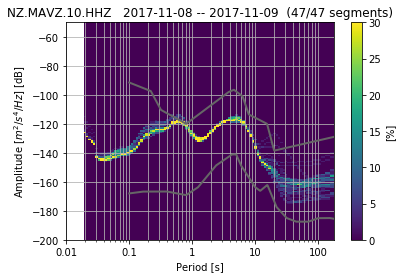

In [96]:
ppsd.plot(show_coverage=False)

In [97]:
mean = ppsd.get_mean()

In [98]:
period1 = mean[0]
frequency1 = 1/period1
amplitude1 = mean[1]

**Second site**

In [99]:
site = 'FWVZ.10.HHZ.NZ'

In [100]:
#split site into components
sta = site.split('.')[0]
loc = site.split('.')[1]
cmp = site.split('.')[2]
net = site.split('.')[3]

In [101]:
#get data stream
dayswave(date1, date2, net, sta, loc, cmp)
#merge streams, fill gaps with zeros
#st.merge(fill_value = 'interpolate')
tr = st[0]
tr

arc client successful


NZ.FWVZ.10.HHZ | 2017-11-08T23:59:57.573129Z - 2017-11-09T01:51:05.343129Z | 100.0 Hz, 666778 samples

In [102]:
print (date1, date2, net, sta, loc, cmp)

2017-11-09 2017-11-09 NZ FWVZ 10 HHZ


In [103]:
#get response, separately
getresp(date1, date2, net, sta, loc, cmp)

arc client successful


In [104]:
ppsd = PPSD(tr.stats, metadata=inventory)

In [105]:
ppsd.add(st)

True

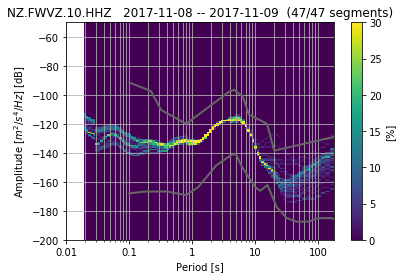

In [106]:
ppsd.plot(show_coverage=False)

In [107]:
mean = ppsd.get_mean()

In [108]:
period2 = mean[0]
frequency2 = 1/period2
amplitude2 = mean[1]

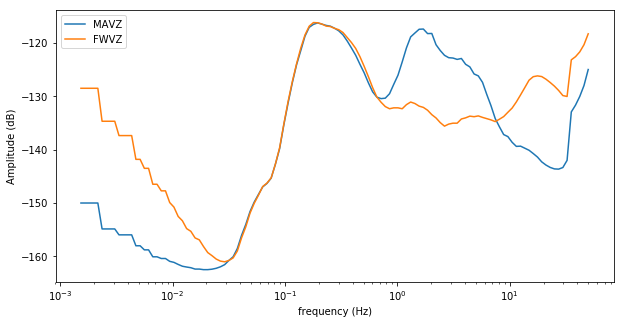

In [110]:
ax = plt.figure(figsize=(10, 5))
plt.semilogx(frequency1, amplitude1, label='MAVZ')
plt.semilogx(frequency2, amplitude2, label='FWVZ')
plt.xlabel('frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.legend(loc='best')